In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_curve, auc

train_data = pd.read_csv('../00-dataset/01-data01/train_data_1.csv')
test_data = pd.read_csv('../00-dataset/01-data01/test_data_1.csv')
validation_data = pd.read_csv('../00-dataset/01-data01/validation_data_1.csv')

In [6]:
print(train_data.describe())
print(test_data.describe())
print(validation_data.describe())

                age           bmi  elective_surgery   ethnicity_0  \
count  21724.000000  21724.000000      21724.000000  21724.000000   
mean      62.322367     29.140378          0.181550      0.121709   
std       16.312379      8.058320          0.385482      0.326957   
min       16.000000     14.844926          0.000000      0.000000   
25%       53.000000     23.789062          0.000000      0.000000   
50%       63.000000     27.942119          0.000000      0.000000   
75%       75.000000     32.635226          0.000000      0.000000   
max       89.000000     67.814990          1.000000      1.000000   

        ethnicity_1   ethnicity_2      gender_0      gender_1        height  \
count  21724.000000  21724.000000  21724.000000  21724.000000  21724.000000   
mean       0.839762      0.849291      0.546861      0.453139    169.715054   
std        0.366835      0.357773      0.497811      0.497811     10.662996   
min        0.000000      0.000000      0.000000      0.000000 

## Model

In [7]:
X_train, y_train = train_data.drop(columns=['hospital_death']), train_data['hospital_death']
X_val, y_val = validation_data.drop(columns=['hospital_death']), validation_data['hospital_death']
X_test, y_test = test_data.drop(columns=['hospital_death']), test_data['hospital_death']

# calculate AUC
def calculate_auc(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    return auc(fpr, tpr), fpr, tpr

# parameter setting
n_estimators_range = [50, 100, 150, 200]
max_depth_range = [5, 10, 15, 20]

best_auc = 0
best_params = None
best_model = None

# grid search
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        # calculate AUC
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]
        current_auc, _, _ = calculate_auc(y_val, y_val_pred_proba)

        # best parameter
        if current_auc > best_auc:
            best_auc = current_auc
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_model = model

print(f"Best Parameters: {best_params}")
print(f"Best Validation AUC: {best_auc:.4f}")



Best Parameters: {'n_estimators': 200, 'max_depth': 20}
Best Validation AUC: 0.8777


In [8]:
# testing with best parameter
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc, fpr, tpr = calculate_auc(y_test, y_test_pred_proba)
print(f"Test AUC: {test_auc:.4f}")

Test AUC: 0.8996


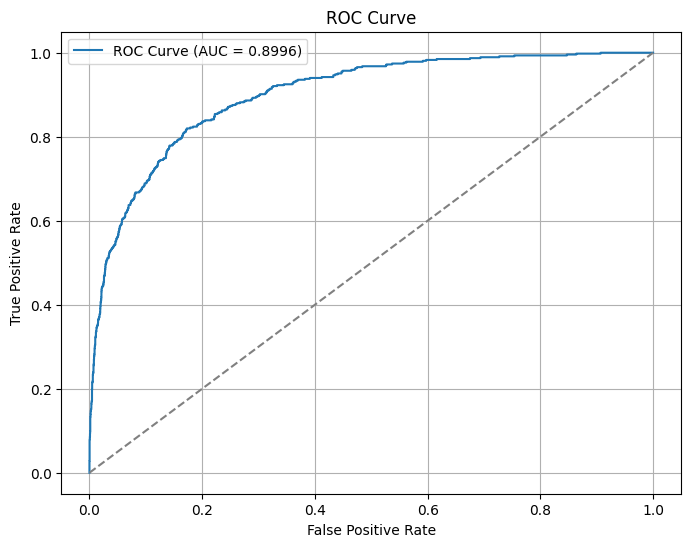

In [9]:
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {test_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()